<a href="https://colab.research.google.com/github/pikey-msc/AprendizMaquina/blob/main/2023-1/KNN/KNN_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',200)

In [1]:
try:
    !rm -rf AprendizMaquina
except:
    print("No existe la ruta aún")



!git clone 'https://github.com/pikey-msc/AprendizMaquina'

Cloning into 'AprendizMaquina'...
remote: Enumerating objects: 211, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 211 (delta 31), reused 130 (delta 28), pack-reused 66
Receiving objects: 100% (211/211), 11.88 MiB | 14.28 MiB/s, done.
Resolving deltas: 100% (48/48), done.


In [ ]:
import missingno as msno

In [ ]:
from sklearn.model_selection import train_test_split

In [3]:
insurance=pd.read_csv('/content/AprendizMaquina/2023-1/KNN/Datos/insurance.csv')

<AxesSubplot:>

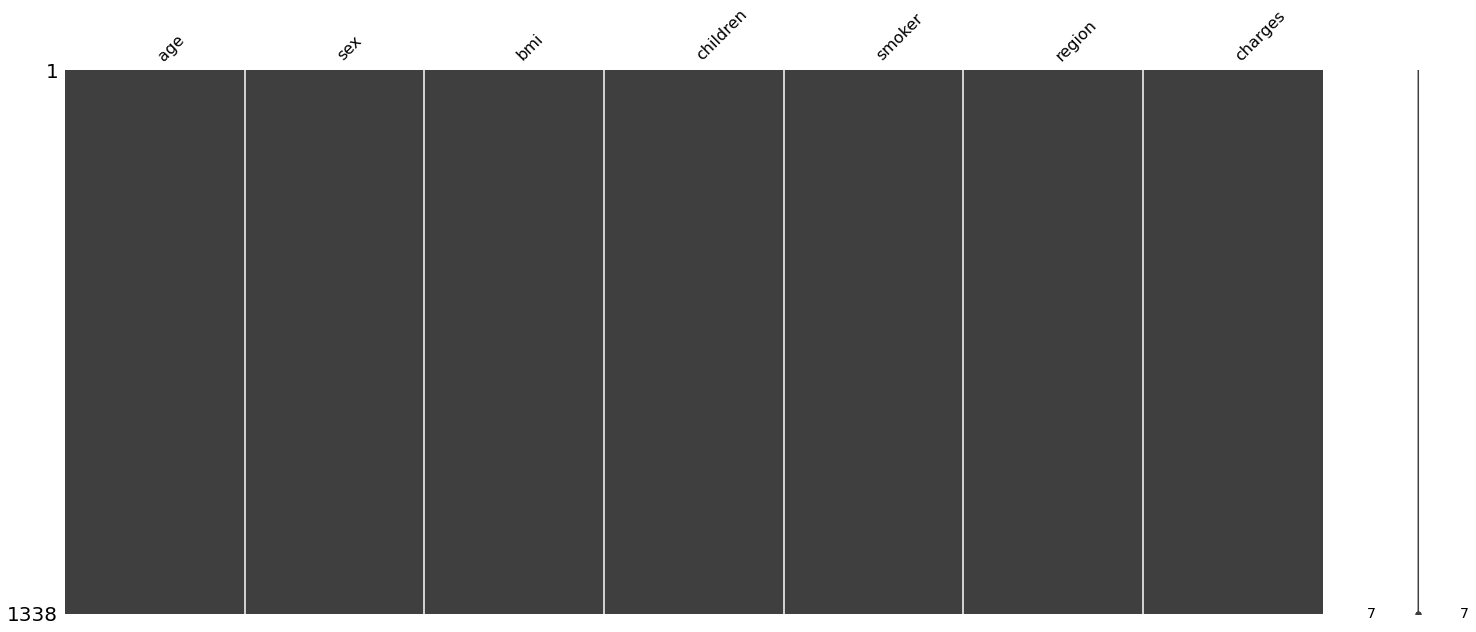

In [ ]:
msno.matrix(insurance)

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dumm_insurance=pd.get_dummies(insurance['region'])

insurance['sex']=insurance['sex'].map(lambda x: 1 if x=='female' else 0)

insurance['smoker']=insurance['smoker'].map(lambda x: 1 if x=='yes' else 0)


df_insurance= pd.concat([insurance,dumm_insurance],axis=1)

In [ ]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,0,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,0,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,0,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,0,28.880,0,0,northwest,3866.85520,0,1,0,0


In [ ]:
target='charges'

cont=[col for col in df_insurance.columns if col not in [target,'region','southwest']]

In [ ]:
df_insurance=df_insurance[cont+[target]].copy()

In [ ]:
X_insurance=df_insurance[cont]
y_insurance=df_insurance[[target]]

In [ ]:
X_train_insurance, X_test_insurance, y_train_insurance, y_test_insurance = train_test_split(X_insurance, y_insurance, test_size = 0.1, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
sc_X=StandardScaler()

X_train_std=sc_X.fit_transform(X_train_insurance)

X_test_std=sc_X.transform(X_test_insurance)

In [ ]:
from sklearn.svm import SVR

In [ ]:
svm=SVR(kernel='poly',degree=4)

In [ ]:
svm.fit(X_train_std,y_train_insurance)

/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(degree=4, kernel='poly')

In [ ]:
svm.predict(X_test_std)


array([9268.53274326, 9270.15638052, 9319.87785086, 9299.26427669,
       9285.35383377, 9263.47969433, 9255.88335018, 9288.86161964,
       9271.09002762, 9264.71761967, 9262.84203131, 9278.53589479,
       9267.44462107, 9265.39971839, 9337.57050778, 9277.15213021,
       9290.12442098, 9263.54157719, 9263.49035058, 9368.61678152,
       9324.96383104, 9286.92687249, 9288.71254723, 9329.21730669,
       9256.65575848, 9269.99421991, 9262.3273502 , 9271.57106928,
       9263.91979139, 9269.3896057 , 9272.01067815, 9384.23203411,
       9282.95838204, 9275.92699778, 9390.68836874, 9262.5681442 ,
       9271.0447105 , 9306.88928225, 9321.44946429, 9266.62765159,
       9268.20587084, 9262.76158724, 9347.45729372, 9318.80752126,
       9370.89934145, 9261.96411654, 9276.98331434, 9263.03578018,
       9263.23930573, 9279.26293873, 9261.12921195, 9266.86908384,
       9289.37981945, 9326.81780925, 9295.62693121, 9266.77252742,
       9256.5939842 , 9273.62990212, 9260.76059267, 9284.27472

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
def metricas_regresion(y_true,y_pred):
    r2=r2_score(y_true,y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    print(f'El r2 score es {r2}')
    print(f'El error cuadrático medio es {mse}')
    print(f'El error medio absoluto es {mae}')

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
Knn=KNeighborsRegressor()

In [ ]:
KNeighborsRegressor?

In [ ]:
Knn.fit(X_train_std,y_train_insurance)

KNeighborsRegressor()

In [ ]:
Knn.predict(X_test_std)

array([[ 8299.452   ],
       [ 7721.46328 ],
       [46710.832484],
       [11777.80179 ],
       [11441.75795 ],
       [ 3668.90685 ],
       [ 2588.9581  ],
       [16508.519848],
       [ 9907.91122 ],
       [ 6124.48175 ],
       [ 7717.33854 ],
       [ 8954.39423 ],
       [ 7022.6268  ],
       [10970.78713 ],
       [20898.19424 ],
       [15144.790592],
       [11617.78854 ],
       [ 6707.536822],
       [ 6432.93079 ],
       [27637.204886],
       [28884.20109 ],
       [16009.216758],
       [10859.95526 ],
       [32173.00028 ],
       [ 1266.6699  ],
       [ 8007.555   ],
       [ 3247.18897 ],
       [11207.758272],
       [ 7938.462988],
       [ 7215.45852 ],
       [ 8001.68597 ],
       [47039.02148 ],
       [13789.98448 ],
       [12493.77308 ],
       [16476.06643 ],
       [ 4068.41571 ],
       [10282.274994],
       [38864.234574],
       [34013.86773 ],
       [ 3980.727666],
       [ 6364.529808],
       [ 2744.52292 ],
       [22469.667024],
       [437

In [ ]:
metricas_regresion(y_test_insurance,Knn.predict(X_test_std))

El r2 score es 0.8797629981711873
El error cuadrático medio es 23314368.977161992
El error medio absoluto es 3257.934568238806


In [ ]:
metricas_regresion(y_test_insurance,svm.predict(X_test_std))

El r2 score es -0.20214245605565395
El error cuadrático medio es 233099564.67059076
El error medio absoluto es 9925.755074106157
